In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Reading data locally
df = pd.read_csv('dataSet/PSID.csv')

#get descriptive statistics
#################################df.describe()

#to remove incomplete data from our DataFrame.
df.dropna()
###############df.describe()
#df['earnings'].plot()
#plt.show()

#check and view simply using a box plot to see whether there are outliers
################plt.show(df['earnings'].plot(kind = 'box'))

#use z score method to remove outliers
arr = outliers_modified_z_score(df['earnings'])
# print (arr)

length = df.count
#print (length)


print('***************\n')
#print(list(df.columns.values))
print (arr)

for i in arr:
    print(i)
    print('\n')

    #df = df.drop(df.index[arr[i]])
#df

# df.to_csv('processed_PSID.csv', sep='\t')




***************

(array([   0,   83,  137,  190,  212,  276,  299,  313,  317,  485,  526,
        549,  571,  696,  723,  827,  947,  949,  998, 1024, 1025, 1172,
       1258, 1259, 1265, 1376, 1459, 1478, 1617, 1620, 1697, 2064, 2288,
       2289, 2472, 2680, 2706, 2753, 2758, 2789, 3207, 3629, 3630, 4286,
       4739, 4827]),)
[   0   83  137  190  212  276  299  313  317  485  526  549  571  696
  723  827  947  949  998 1024 1025 1172 1258 1259 1265 1376 1459 1478
 1617 1620 1697 2064 2288 2289 2472 2680 2706 2753 2758 2789 3207 3629
 3630 4286 4739 4827]




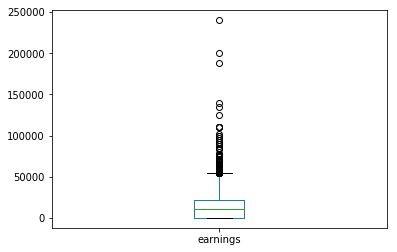

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Reading data locally
df = pd.read_csv('dataSet/PSID.csv')


#get descriptive statistics
df.describe()

#to remove incomplete data from our DataFrame.
df.dropna()
###############df.describe()
#df['earnings'].plot()
#plt.show()

#check and view simply using a box plot to see whether there are outliers
plt.show(df['earnings'].plot(kind = 'box'))

#use z score method to remove outliers
arr = outliers_modified_z_score(df['earnings'])

#remove the outliers from data frame
#for i in arr:
    #df.drop(df.index[arr[i]])
    

#export the data into csv
#df.to_csv('processed_PSID.csv', sep='\t')



In [63]:
#to detect whether there are outliers using z scores method
# remove data that z score is less than -3.0 and over +3.0

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)
